In [1]:
train_path = '/Users/kshitijaupasham/Desktop/monkey_species/training/training'
test_path = '/Users/kshitijaupasham/Desktop/monkey_species/validation/validation'

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.mobilenet import preprocess_input
train_datagen = ImageDataGenerator(preprocessing_function = preprocess_input)
test_datagen = ImageDataGenerator(preprocessing_function = preprocess_input)
train = train_datagen.flow_from_directory(train_path,target_size=(224, 224),color_mode='rgb',class_mode='categorical',batch_size=32)
test = test_datagen.flow_from_directory(test_path,target_size=(224, 224),color_mode='rgb',class_mode='categorical',batch_size=32)

Found 1098 images belonging to 10 classes.
Found 272 images belonging to 10 classes.


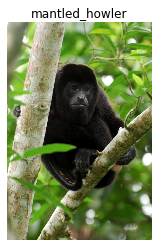

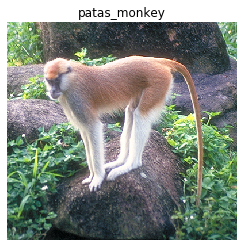

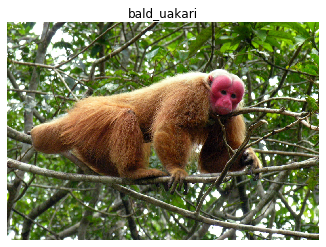

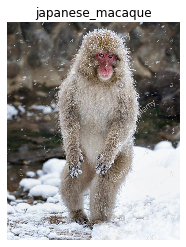

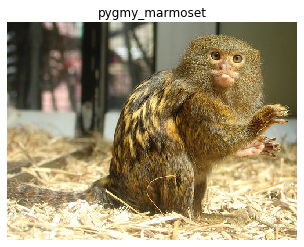

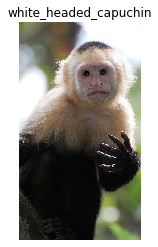

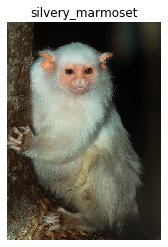

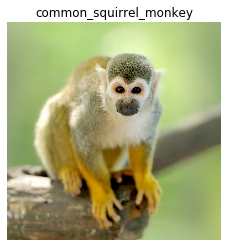

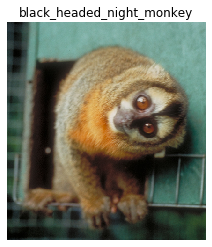

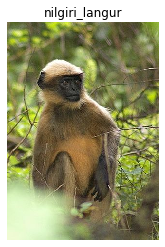

In [3]:
import cv2
import matplotlib.pyplot as plt

labels=['mantled_howler',                
     'patas_monkey',                  
     'bald_uakari',                   
     'japanese_macaque',              
     'pygmy_marmoset',                
     'white_headed_capuchin',         
     'silvery_marmoset',              
     'common_squirrel_monkey',        
     'black_headed_night_monkey',     
     'nilgiri_langur']

imgs = ['/n019.jpg',
    '/n1021.jpg',
    '/n2030.jpg',
    '/n3041.jpg',
    '/n4026.jpg',
    '/n5020.jpg',
    '/n6037.jpg',
    '/n7056.jpg',
    '/n8033.jpg',
    '/n915.jpg']

path = '/Users/kshitijaupasham/Desktop/monkey_species/training/training/n'

i=0
for j in imgs:
    img = cv2.imread(path + str(i) + j) 
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title(labels[i])
    i=i+1
    plt.axis('off')
    plt.show()

In [3]:
thresh = 0.9810

In [4]:
from tensorflow.keras.callbacks import Callback
class myCallback(Callback): 
    def on_epoch_end(self, epoch, logs={}): 
        if(logs.get('val_accuracy') > thresh):   
            self.model.stop_training = True

In [5]:
callbacks = myCallback()

In [6]:
from tensorflow.keras.applications.mobilenet import MobileNet
mobilenet_model = MobileNet()
mobilenet_model.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 225, 225, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32

In [7]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense


x = mobilenet_model.layers[-6].output
predictions = Dense(10,activation = 'softmax')(x)
model = Model(inputs=mobilenet_model.input, outputs=predictions)

In [8]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 225, 225, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128   

In [9]:
for layer in model.layers[:-5]:
    layer.trainable = False    

In [10]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [11]:
train_steps=train.n//train.batch_size
validation_steps=test.n//test.batch_size
history = model.fit(train,steps_per_epoch=train_steps,validation_data=test,validation_steps=validation_steps,epochs=30, callbacks=[callbacks])

Epoch 1/30
34/34 [==============================] - 58s 2s/step - loss: 0.3921 - accuracy: 0.8759 - val_loss: 1.7675 - val_accuracy: 0.6523
Epoch 2/30
34/34 [==============================] - 60s 2s/step - loss: 0.0218 - accuracy: 0.9953 - val_loss: 1.1140 - val_accuracy: 0.7383
Epoch 3/30
34/34 [==============================] - 56s 2s/step - loss: 0.0098 - accuracy: 0.9962 - val_loss: 0.5038 - val_accuracy: 0.8633
Epoch 4/30
34/34 [==============================] - 57s 2s/step - loss: 0.0025 - accuracy: 1.0000 - val_loss: 0.2114 - val_accuracy: 0.9336
Epoch 5/30
34/34 [==============================] - 56s 2s/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 0.1261 - val_accuracy: 0.9570
Epoch 6/30
34/34 [==============================] - 57s 2s/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.0937 - val_accuracy: 0.9688
Epoch 7/30
34/34 [==============================] - 59s 2s/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.0768 - val_accuracy: 0.9688
Epoch 8/30
34/34 [==

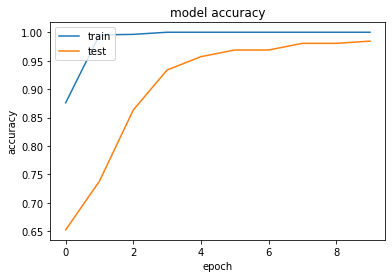

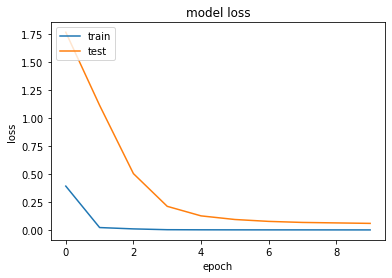

In [12]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [14]:
98.44

98.44